In [11]:
import ISLP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("C:/Users/thiru/Downloads/Auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
# Let's clean 'horsepower' first
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger



###  2 Quantitative Variables:
- mpg, cylinders, displacement, horsepower, weight, acceleration, model year

### Qualitative Variables:
- origin, car name

### 3. Range of Quantitative Predictors

In [16]:

quant_cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year']

for col in quant_cols:
    print(col, df[col].max() - df[col].min())

mpg 37.6
cylinders 5
displacement 387.0
horsepower 184.0
weight 3527
acceleration 16.8
model year 12


### 4. Mean and Standard Deviation

In [17]:

df[quant_cols].agg(['mean','std'])


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627


### 5. Remove 10th to 85th Observations

In [18]:
reduced_df = df.drop(index=range(9, 85)).reset_index(drop=True)
reduced_stats = reduced_df[quant_cols].agg(['min', 'max', 'mean', 'std'])
reduced_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000
mean,24.434161,5.366460,186.937888,100.955836,2934.276398,15.737888,77.167702
std,7.896264,1.652674,99.500352,35.895567,809.398855,2.689542,3.118103


### 6. Scatterplots and Graphical Analysis

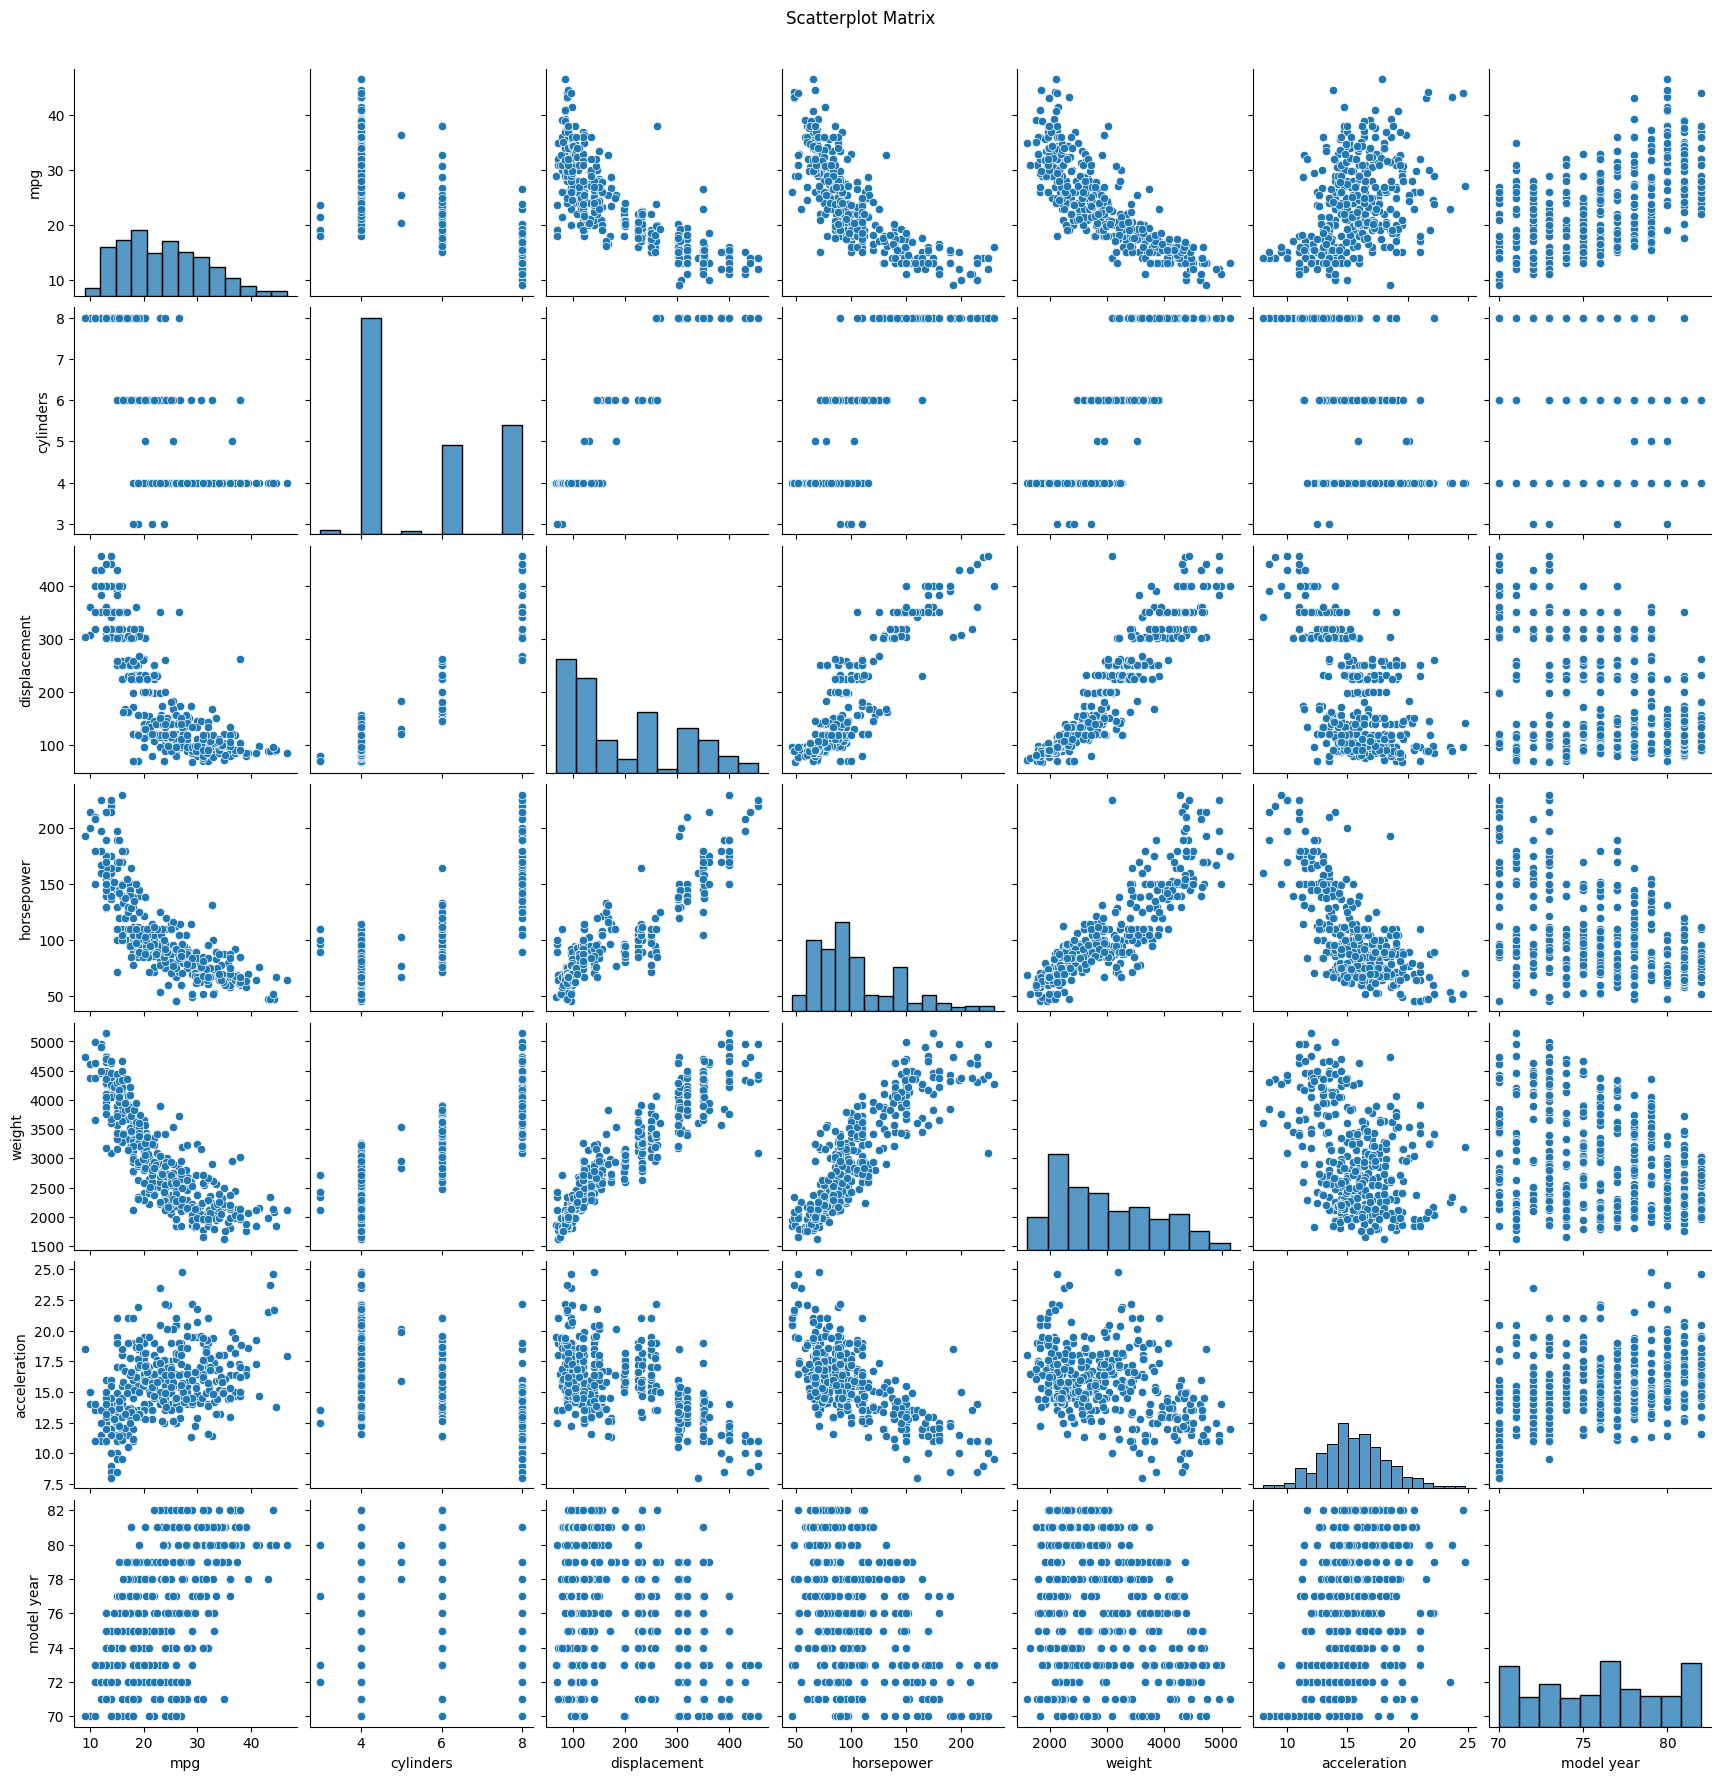

In [19]:

sns.pairplot(df[quant_cols])
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

In [20]:
corr_mpg = df[quant_cols].corr()['mpg'].sort_values(ascending=False)
corr_mpg

mpg             1.000000
model year      0.579267
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_2', 'origin_3', 'mpg01'],
      dtype='object')


In [49]:
from sklearn.linear_model import LinearRegression

# Define independent (X) and dependent (y)
X = df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin_2','origin_3']]
y = df['mpg']

# Build Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -17.954602067289994
Coefficients: [-0.48970942  0.02397864 -0.01818346 -0.00671038  0.07910304  0.77702694
  2.63000236  2.85322823]


### 7. Conclusion

The linear regression model shows that weight, horsepower, and cylinders negatively affect fuel efficiency, while newer model years and car origin positively influence mpg. This indicates that lighter, less powerful, and newer cars have better gas mileage.